In [9]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [10]:
# Load the dataset
df = pd.read_csv('Mall_customers.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nStatistical summary:")
print(df.describe())

Dataset shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

In [11]:
# Select features for clustering (Annual Income and Spending Score only)
# Using only 2 features to reduce dendrogram clutter
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

print("Features selected for clustering:")
print("Shape:", X.shape)
print("\nFeature matrix (first 10 rows):")
print(X[:10])

Features selected for clustering:
Shape: (200, 2)

Feature matrix (first 10 rows):
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


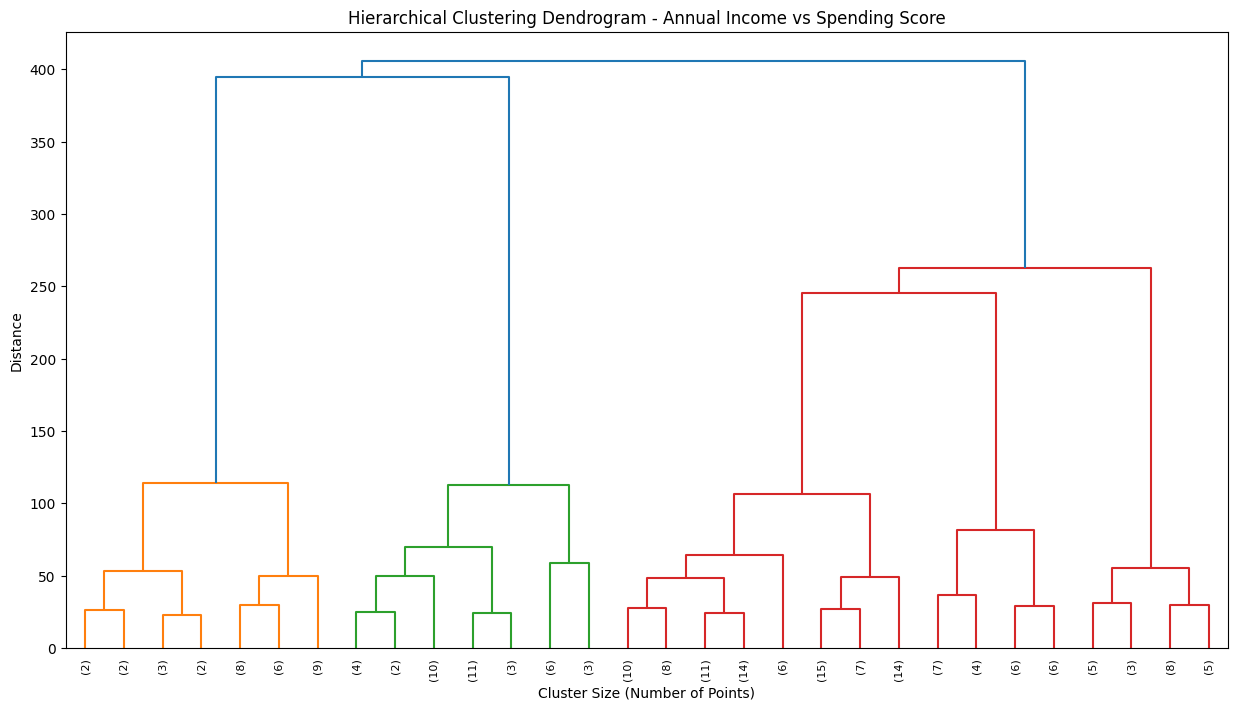

In [12]:
# Create hierarchical clustering linkage using Ward method
linkage_matrix = linkage(X, method='ward')

# Plot dendrogram with reduced clutter
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp',  # Show only last p merged clusters
           p=30,  # Show last 30 merges to reduce clutter
           leaf_rotation=90,
           leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram - Annual Income vs Spending Score')
plt.xlabel('Cluster Size (Number of Points)')
plt.ylabel('Distance')
plt.show()

In [13]:
# Apply Agglomerative Clustering with different numbers of clusters
n_clusters = 5

agglo_clustering = AgglomerativeClustering(n_clusters=n_clusters, 
                                         linkage='ward')
cluster_labels = agglo_clustering.fit_predict(X)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

print(f"Agglomerative Clustering with {n_clusters} clusters:")
print("Cluster labels:", cluster_labels)
print("\nCluster distribution:")
print(df['Cluster'].value_counts().sort_index())

Agglomerative Clustering with 5 clusters:
Cluster labels: [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]

Cluster distribution:
Cluster
0    32
1    85
2    39
3    21
4    23
Name: count, dtype: int64


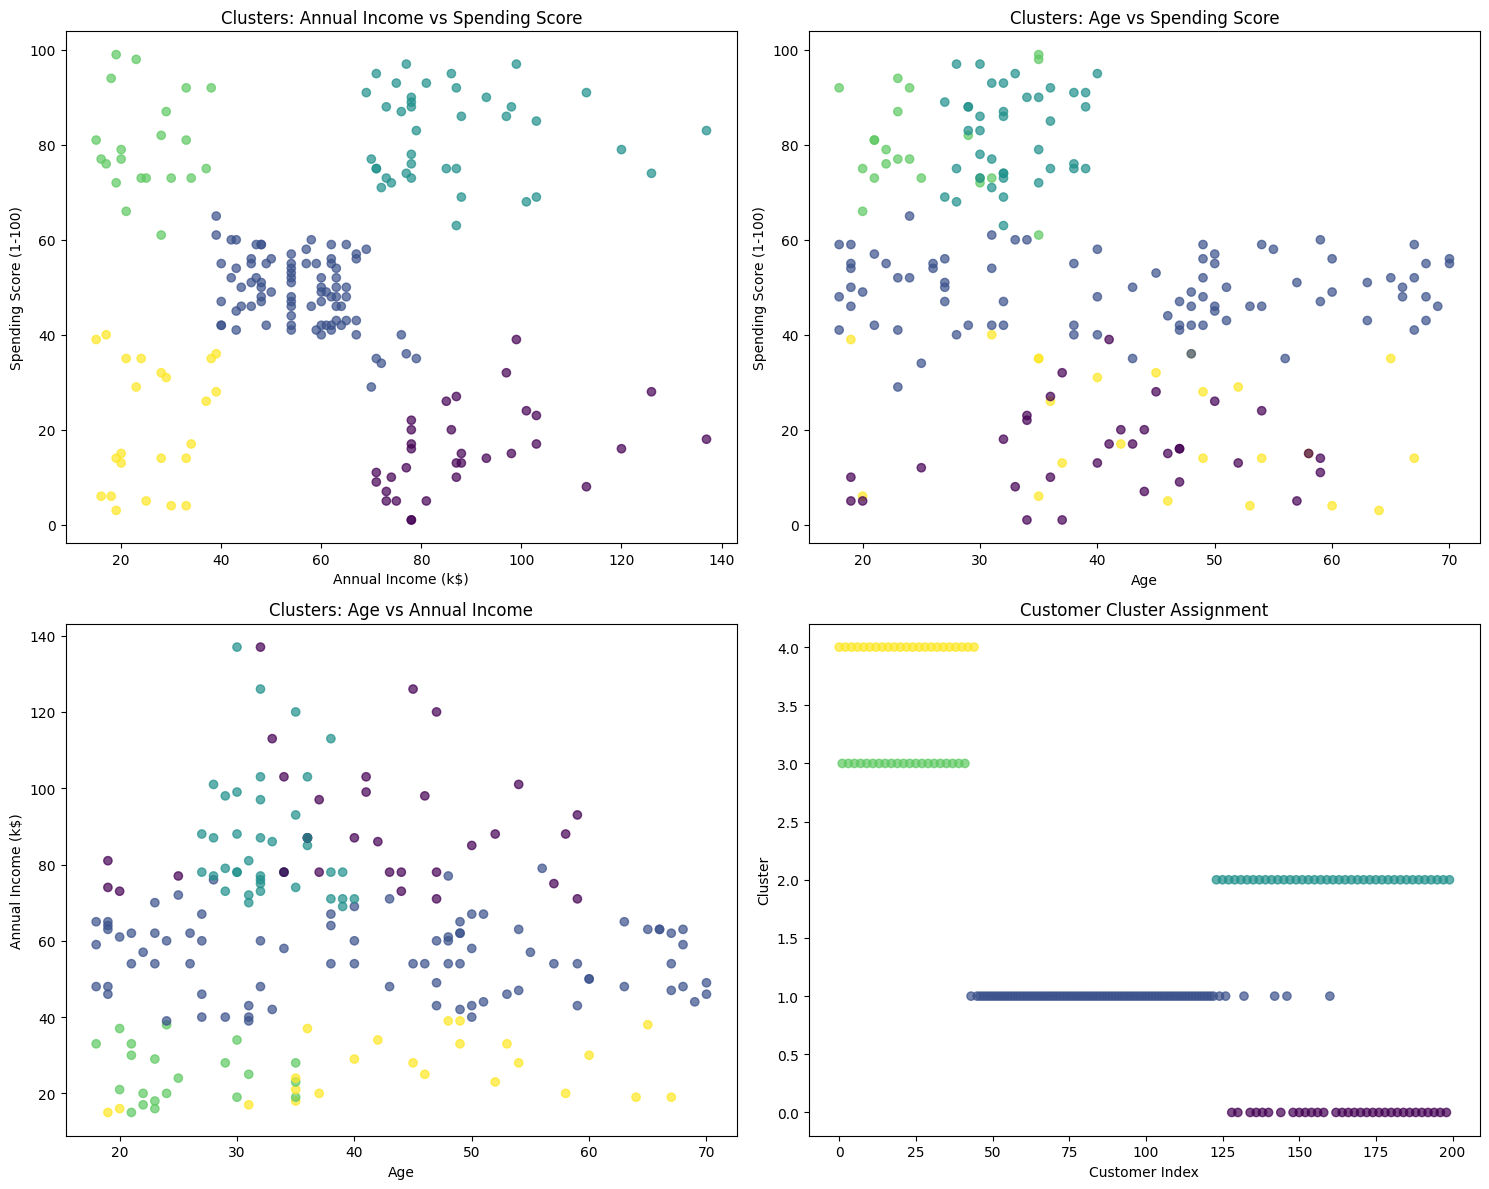

In [14]:
# Visualize clusters
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Annual Income vs Spending Score
axes[0, 0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                   c=df['Cluster'], cmap='viridis', alpha=0.7)
axes[0, 0].set_xlabel('Annual Income (k$)')
axes[0, 0].set_ylabel('Spending Score (1-100)')
axes[0, 0].set_title('Clusters: Annual Income vs Spending Score')

# Plot 2: Age vs Spending Score
axes[0, 1].scatter(df['Age'], df['Spending Score (1-100)'], 
                   c=df['Cluster'], cmap='viridis', alpha=0.7)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Spending Score (1-100)')
axes[0, 1].set_title('Clusters: Age vs Spending Score')

# Plot 3: Age vs Annual Income
axes[1, 0].scatter(df['Age'], df['Annual Income (k$)'], 
                   c=df['Cluster'], cmap='viridis', alpha=0.7)
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Annual Income (k$)')
axes[1, 0].set_title('Clusters: Age vs Annual Income')

# Plot 4: 3D scatter plot (flattened to 2D for visualization)
axes[1, 1].scatter(range(len(df)), df['Cluster'], 
                   c=df['Cluster'], cmap='viridis', alpha=0.7)
axes[1, 1].set_xlabel('Customer Index')
axes[1, 1].set_ylabel('Cluster')
axes[1, 1].set_title('Customer Cluster Assignment')

plt.tight_layout()
plt.show()

In [15]:
# Analyze cluster characteristics
print("Cluster Analysis:")
print("=" * 50)

for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_data)} customers):")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f}")
    print(f"  Average Annual Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"  Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}")
    print(f"  Gender distribution:")
    print(f"    {cluster_data['Gender'].value_counts().to_dict()}")

# Display cluster summary statistics
print("\n" + "=" * 50)
print("Detailed Cluster Statistics:")
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'std', 'min', 'max'])
print(cluster_summary)

Cluster Analysis:

Cluster 0 (32 customers):
  Average Age: 41.0
  Average Annual Income: $89.4k
  Average Spending Score: 15.6
  Gender distribution:
    {'Male': 18, 'Female': 14}

Cluster 1 (85 customers):
  Average Age: 42.5
  Average Annual Income: $55.8k
  Average Spending Score: 49.1
  Gender distribution:
    {'Female': 51, 'Male': 34}

Cluster 2 (39 customers):
  Average Age: 32.7
  Average Annual Income: $86.5k
  Average Spending Score: 82.1
  Gender distribution:
    {'Female': 21, 'Male': 18}

Cluster 3 (21 customers):
  Average Age: 25.3
  Average Annual Income: $25.1k
  Average Spending Score: 80.0
  Gender distribution:
    {'Female': 12, 'Male': 9}

Cluster 4 (23 customers):
  Average Age: 45.2
  Average Annual Income: $26.3k
  Average Spending Score: 20.9
  Gender distribution:
    {'Female': 14, 'Male': 9}

Detailed Cluster Statistics:
               Age                    Annual Income (k$)                      \
              mean        std min max               me